# Template Matching

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from custom_utils import *

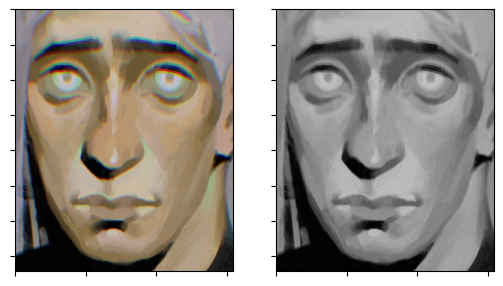

In [6]:
template_img = load_image_and_show('../data/ptitatart2-template.jpeg')

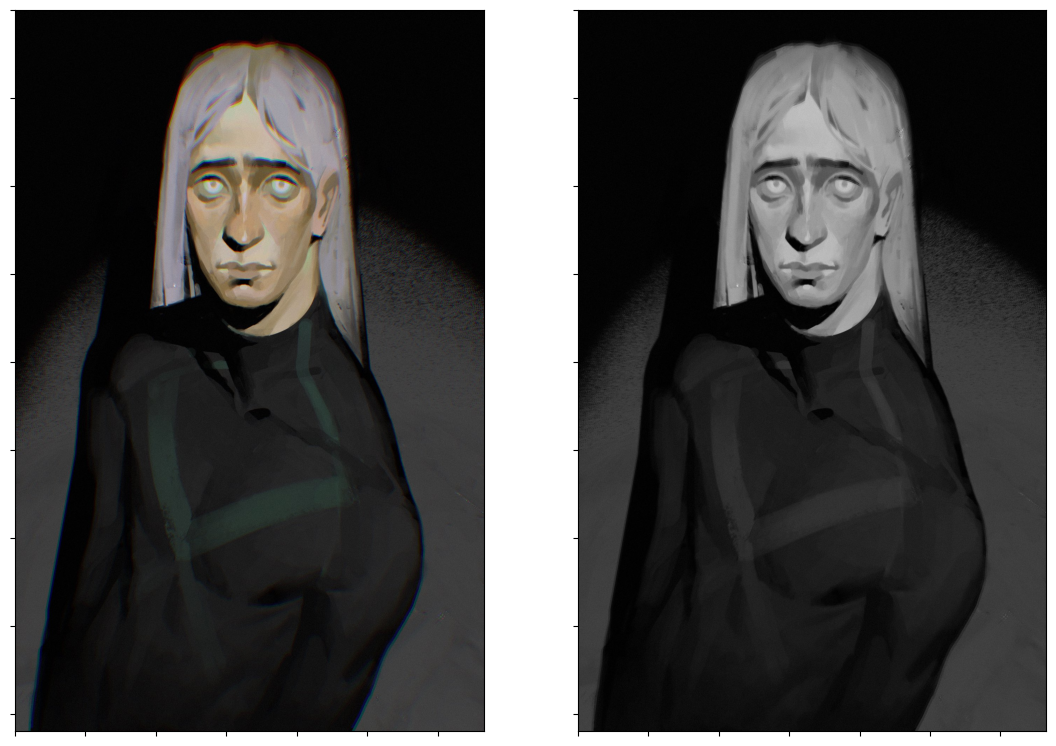

In [8]:
input_image = load_image_and_show('../data/ptitsatart2.jpeg', scale=0.5)

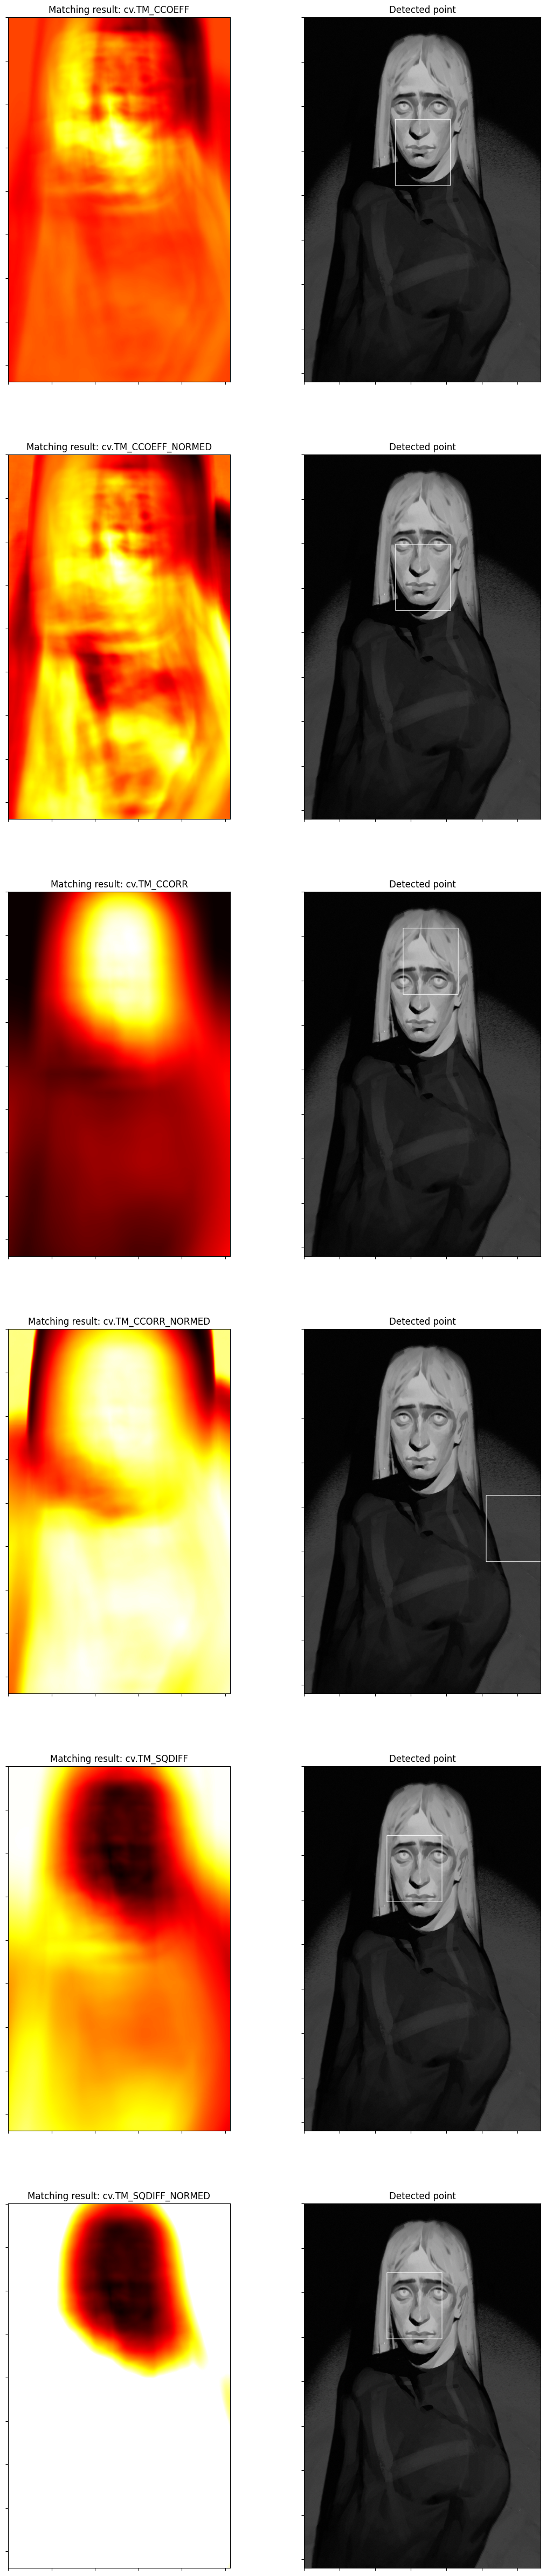

In [32]:
w, h = template_img[1], template_img[0]
ih, iw = input_image[:2]
scale = 0.5
methods = [f"cv.{t}" for t in dir(cv) if 'TM_' in t]

template = template_img[4].copy()

_, ax = plt.subplots(len(methods), 2, figsize=(iw*2*scale/100, ih*len(methods)*scale/100))
for i, meth in enumerate(methods):
    method = eval(meth)
    img = input_image[4].copy()

    # Apply template matchings
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right, 255, 2)

    show_image(res, ax = ax[i, 0], title=f"Matching result: {methods[i]}", imshow_args={'cmap': 'hot'})
    show_image(img, ax = ax[i, 1], title=f"Detected point", imshow_args={'cmap': 'gray'})
plt.show()

In [ ]:
methods

['TM_CCOEFF',
 'TM_CCOEFF_NORMED',
 'TM_CCORR',
 'TM_CCORR_NORMED',
 'TM_SQDIFF',
 'TM_SQDIFF_NORMED']